# 4 - Cluster Network_2

In [1]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 3
# [0 0 0 0 0 1 0 0 1]

In [3]:
train_df = pd.read_csv('./data/train.csv')
one_hot_color = pd.get_dummies(train_df.color).values
one_hot_marker = pd.get_dummies(train_df.marker).values

labels = np.concatenate((one_hot_color, one_hot_marker), axis=1)
print(labels[0])

print(train_df.head())

[0 0 0 0 1 0 0 0 1]
          x         y color marker
0 -0.765775  1.006452   red      ^
1  0.229016  0.094320   red      ^
2  0.189987  1.589141   red      ^
3  0.580085  0.520488   red      ^
4  0.292287  0.317852   red      ^


# Plotting Data

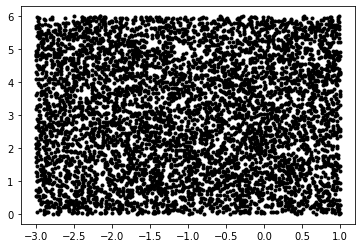

In [4]:
plt.scatter(train_df.x, train_df.y, marker = '.', color='black')

plt.show()

# Sequencial API

In [5]:
# model = keras.Sequential([
# 	keras.layers.Flatten(input_shape=(2,)),
# 	keras.layers.Dense(64, activation='relu'),
# 	keras.layers.Dense(64, activation='relu'),
# 	keras.layers.Dense(9, activation='sigmoid')])

# Functional API

In [6]:
# Functional API (Func: It is more flexible as it can handle multiple input and multiple output - More Flexible)
inputs = keras.Input(shape=(2,))
x = keras.layers.Dense(64, activation='relu', name='First_layer')(inputs)
x = keras.layers.Dense(64, activation='relu', name='Second_layer')(x)
outputs = keras.layers.Dense(9, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

print(model.summary())   # Network information -> Layers -> Nodes -> Parameters

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
First_layer (Dense)          (None, 64)                192       
_________________________________________________________________
Second_layer (Dense)         (None, 64)                4160      
_________________________________________________________________
dense (Dense)                (None, 9)                 585       
Total params: 4,937
Trainable params: 4,937
Non-trainable params: 0
_________________________________________________________________
None


# Modal Training

In [7]:
model.compile(optimizer='adam',
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

x = np.column_stack((train_df.x.values, train_df.y.values))

In [8]:
np.random.RandomState(seed=42).shuffle(x)
np.random.RandomState(seed=42).shuffle(labels)

clf = model.fit(x, labels, batch_size=4, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6702 - binary_accuracy: 0.8573
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6535 - binary_accuracy: 0.8909
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6499 - binary_accuracy: 0.8969
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6487 - binary_accuracy: 0.8991
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6444 - binary_accuracy: 0.9111
Epoch 6/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.6334 - binary_accuracy: 0.9431
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6303 - binary_accuracy: 0.9497
Epoch 8/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6293 - binary_accuracy: 0.9517
Epoch 9/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6286 - binary_accuracy: 0.9525
Epoch 10/10
1500/15

# One Hot Coding of Test Data

In [9]:
test_df = pd.read_csv('./data/test.csv')
test_x = np.column_stack((test_df.x.values, test_df.y.values))

test_one_hot_color = pd.get_dummies(test_df.color).values
test_one_hot_marker = pd.get_dummies(test_df.marker).values

# Test Data Evaluation

In [10]:
test_labels = np.concatenate((test_one_hot_color, test_one_hot_marker), axis=1)

print("EVALUATION")
model.evaluate(test_x, test_labels)


print("Prediction", np.round(model.predict(np.array([[0,3], [0,1], [-2, 1]]))))

EVALUATION
38/38 [==============================] - 0s 1ms/step - loss: 0.6280 - binary_accuracy: 0.9531
Prediction [[0. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0.]]


# Test Data Plot

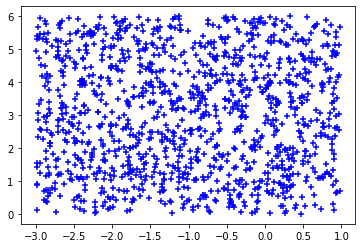

In [11]:
plt.scatter(test_df.x,test_df.y, marker='+', color=['blue'])
plt.show()

# Plotting Hyperplane ( Training Data )

In [ ]:
from mlxtend.plotting import plot_decision_regions

# Plot decision boundary
a = plot_decision_regions(x, labels.astype(np.int_), clf=clf, legend=6)
handles, labels = a.get_legend_handles_labels()

plt.show()

# Plot